# Partie 1


## Marché en temps réels

In [18]:
import pandas as pd
import yfinance as yf
import pandas as pd
import time
import plotly.graph_objs as go
import requests
import plotly.express as px

#### Calcul d'indices sur les 5 dernières journées

In [19]:
def fetch_market_data_fixed(indices):
    data = []
    for nom, symbole in indices.items():
        try:
            # Récupération de l'historique sur 5 jours
            ticker = yf.Ticker(symbole)
            historique = ticker.history(period="5d")

            # Vérification que nous avons au moins 2 jours de données
            if len(historique) >= 2:
                # Calcul du prix actuel et de la variation
                prix = historique["Close"].iloc[-1]  # Dernier prix de clôture
                prix_precedent = historique["Close"].iloc[-2]  # Prix de clôture précédent
                variation = ((prix - prix_precedent) / prix_precedent) * 100
                variation_str = f"{variation:.2f}%"
            else:
                prix = "N/A"
                variation_str = "N/A"

            # Ajout des données pour cet indice
            data.append([nom, round(prix, 2) if isinstance(prix, (float, int)) else prix, variation_str])
        except Exception as e:
            print(f"Erreur pour {nom} ({symbole}) : {str(e)}")
            data.append([nom, "N/A", "N/A"])
    
    
    return pd.DataFrame(data, columns=["Indice", "Prix Actuel", "Variation (%)"])

# Liste des indices
indices = {
    "Dow Jones": "^DJI",
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "CAC 40": "^FCHI",
    "DAX": "^GDAXI"
}

df = fetch_market_data_fixed(indices)
df

,Indice,Prix Actuel,Variation (%)
0,Dow Jones,44910.65,0.42%
1,S&P 500,6032.38,0.56%
2,NASDAQ,19218.17,0.83%
3,CAC 40,7170.91,-0.89%
4,DAX,19600.29,-0.13%


#### Rafraichissement des données :

In [20]:
import time

# Fonction pour rafraîchir les données
def simulate_refresh():
    print("Données rafraîchies à :", time.strftime('%H:%M:%S'))
    time.sleep(2) 

# Simuler un rafraîchissement
for i in range(3):
    simulate_refresh()

Données rafraîchies à : 10:10:10
Données rafraîchies à : 10:10:12
Données rafraîchies à : 10:10:14


In [21]:
# Fonction pour styliser les variations
def highlight_variation(val):
    try:
        val_float = float(val.strip('%'))
        if val_float > 0:
            color = 'green'
            icon = '🔼'
        elif val_float < 0:
            color = 'red'
            icon = '🔽'
        else:
            color = 'grey'
            icon = ''
        return f"{icon} {val} ({color})"
    except:
        return val

# Appliquer la stylisation
df["Variation Stylisée"] = df["Variation (%)"].apply(highlight_variation)
df

,Indice,Prix Actuel,Variation (%),Variation Stylisée
0,Dow Jones,44910.65,0.42%,🔼 0.42% (green)
1,S&P 500,6032.38,0.56%,🔼 0.56% (green)
2,NASDAQ,19218.17,0.83%,🔼 0.83% (green)
3,CAC 40,7170.91,-0.89%,🔽 -0.89% (red)
4,DAX,19600.29,-0.13%,🔽 -0.13% (red)


In [22]:
# Statistiques sur les variations récupérées
stats = df[df["Variation (%)"] != "N/A"].copy()
stats["Variation Numérique"] = stats["Variation (%)"].apply(lambda x: float(x.strip('%')))
summary = stats["Variation Numérique"].describe()


print("Statistiques sur les variations récupérées :")
print(summary)

Statistiques sur les variations récupérées :
count    5.000000
mean     0.158000
std      0.682473
min     -0.890000
25%     -0.130000
50%      0.420000
75%      0.560000
max      0.830000
Name: Variation Numérique, dtype: float64


## Recherche actions/Comparaisons d'action 

Comment récupérer les données financières pour une action spécifique via Yahoo Finance (yfinance),
les analyser et les visualiser avec Plotly.

In [23]:
# Paramètres utilisateur simulés
symbole = "AAPL"  # Exemple : symbole pour Apple
periode = "1y"  # Période d'historique (par exemple, 1 an)

# Fonction pour récupérer l'historique des prix d'une action
def fetch_stock_data(symbole, periode):
    try:
        # Récupérer les données historiques
        ticker = yf.Ticker(symbole)
        historique = ticker.history(period=periode)
        
        # Vérifier si les données sont disponibles
        if historique.empty:
            print(f"Aucune donnée trouvée pour le symbole {symbole}.")
            return None, None
        
        # Récupérer les informations générales
        info = ticker.info
        return historique, info
    except Exception as e:
        print(f"Erreur lors de la récupération des données : {str(e)}")
        return None, None

# Appel de la fonction
historique, info = fetch_stock_data(symbole, periode)
historique.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-30 00:00:00-05:00,188.914492,189.392163,187.272542,189.023956,48794400,0.0,0.0
2023-12-01 00:00:00-05:00,189.402126,190.626126,188.307483,190.307693,45679300,0.0,0.0
2023-12-04 00:00:00-05:00,189.053837,189.123503,186.536172,188.506516,43389500,0.0,0.0
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,193.502021,193.810508,191.173433,191.382416,41089700,0.0,0.0


In [24]:
if info:
    print(f"Nom complet : {info.get('longName', 'N/A')}")
    print(f"Secteur : {info.get('sector', 'N/A')}")
    print(f"Industrie : {info.get('industry', 'N/A')}")
    print(f"Site Web : {info.get('website', 'N/A')}")

Nom complet : Apple Inc.
Secteur : Technology
Industrie : Consumer Electronics
Site Web : https://www.apple.com


In [25]:
if info:
    print(f"Prix actuel : ${info.get('currentPrice', 'N/A')}")
    print(f"Variation sur 1 an : {info.get('52WeekChange', 0):.2%}")
    print(f"Capitalisation boursière : ${info.get('marketCap', 'N/A'):,}")
    print(f"PER (TTM) : {info.get('trailingPE', 'N/A')}")
    print(f"Bénéfice par action (EPS) : ${info.get('trailingEps', 'N/A')}")
    print(f"Dividende : {info.get('dividendYield', 0):.2%}")

Prix actuel : $237.33
Variation sur 1 an : 25.29%
Capitalisation boursière : $3,587,432,775,680
PER (TTM) : 39.034542
Bénéfice par action (EPS) : $6.08
Dividende : 0.42%


In [26]:
if historique is not None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=historique.index,
        y=historique["Close"],
        mode='lines',
        name='Prix de clôture'
    ))
    fig.update_layout(
        title=f"Historique du prix de l'action {symbole.upper()}",
        xaxis_title="Date",
        yaxis_title="Prix de clôture",
        template="plotly_dark"
    )
    fig.show()

In [27]:
# Liste des actions à comparer
actions = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "NFLX", "META"]
periode = "1y"  # Période d'historique
intervalle = "1d"  # Intervalle des données (1 jour)

# Fonction pour récupérer les données pour plusieurs actions
def fetch_multiple_stocks(actions, periode, intervalle):
    donnees = {}
    for symbole in actions:
        try:
            ticker = yf.Ticker(symbole)
            historique = ticker.history(period=periode, interval=intervalle)
            if not historique.empty:
                donnees[symbole] = historique["Close"]
            else:
                print(f"Aucune donnée trouvée pour {symbole}.")
        except Exception as e:
            print(f"Erreur pour {symbole} : {str(e)}")
    return pd.DataFrame(donnees)

# Récupération des données pour toutes les actions
df_comparaison = fetch_multiple_stocks(actions, periode, intervalle)
df_comparaison.head()

,AAPL,MSFT,TSLA,GOOGL,AMZN,NFLX,META
Date,,,,,,,
2023-11-30 00:00:00-05:00,189.023956,376.097595,240.080002,132.202637,146.089996,473.970001,326.167938
2023-12-01 00:00:00-05:00,190.307693,371.730255,238.830002,131.534302,147.029999,465.739990,323.844971
2023-12-04 00:00:00-05:00,188.506516,366.400116,235.580002,128.950699,144.839996,453.899994,319.059357
2023-12-05 00:00:00-05:00,192.477051,369.755005,238.720001,130.666458,146.880005,455.149994,317.334564
2023-12-06 00:00:00-05:00,191.382416,366.062653,239.369995,129.698853,144.520004,446.730011,316.497070


In [28]:
# Normaliser les données (base 100)
df_normalise = df_comparaison / df_comparaison.iloc[0] * 100
df_normalise.head()

,AAPL,MSFT,TSLA,GOOGL,AMZN,NFLX,META
Date,,,,,,,
2023-11-30 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-12-01 00:00:00-05:00,100.679140,98.838775,99.479340,99.494462,100.643441,98.263601,99.287800
2023-12-04 00:00:00-05:00,99.726256,97.421552,98.125625,97.540187,99.144363,95.765553,97.820576
2023-12-05 00:00:00-05:00,101.826803,98.313579,99.433522,98.838012,100.540768,96.029283,97.291771
2023-12-06 00:00:00-05:00,101.247704,97.331825,99.704262,98.106101,98.925325,94.252803,97.035004


In [29]:
# Calcul des variations en pourcentage
variations = df_comparaison.apply(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
)

# Afficher les variations
print("Variations en pourcentage sur la période :")
print(variations)

Variations en pourcentage sur la période :
AAPL     25.555515
MSFT     12.593113
TSLA     43.768744
GOOGL    27.796239
AMZN     42.302693
NFLX     87.102558
META     76.081074
dtype: float64


In [30]:
# Statistiques de prix et volume
prix_max = df_comparaison.max()
prix_min = df_comparaison.min()

# Affichage des statistiques
print("Prix maximums sur la période :")
print(prix_max)
print("Prix minimums sur la période :")
print(prix_min)

Prix maximums sur la période :
AAPL     237.330002
MSFT     465.786438
TSLA     352.559998
GOOGL    190.926636
AMZN     214.100006
NFLX     897.789978
META     595.940002
dtype: float64
Prix minimums sur la période :
AAPL     164.405121
MSFT     363.213928
TSLA     142.050003
GOOGL    128.950699
AMZN     144.520004
NFLX     446.730011
META     316.497070
dtype: float64


In [31]:
import plotly.graph_objects as go

fig = go.Figure()
for action in df_comparaison.columns:
    fig.add_trace(go.Scatter(
        x=df_comparaison.index,
        y=df_comparaison[action],
        mode='lines',
        name=action
    ))

fig.update_layout(
    title="Comparaison des Prix de Clôture des Actions",
    xaxis_title="Date",
    yaxis_title="Prix de Clôture",
    template="plotly_dark",
    hovermode="x unified"
)
fig.show()

In [32]:
fig_normalise = go.Figure()
for action in df_normalise.columns:
    fig_normalise.add_trace(go.Scatter(
        x=df_normalise.index,
        y=df_normalise[action],
        mode='lines',
        name=action
    ))

fig_normalise.update_layout(
    title="Comparaison des Tendances (Normalisées, Base 100)",
    xaxis_title="Date",
    yaxis_title="Prix Normalisé",
    template="plotly_dark",
    hovermode="x unified"
)
fig_normalise.show()

In [33]:
# Créer un tableau récapitulatif des performances
tableau_performance = pd.DataFrame({
    "Symbole": df_comparaison.columns,
    "Variation (%)": variations,
    "Prix Max": prix_max,
    "Prix Min": prix_min
}).reset_index(drop=True)

# Ajustement des formats numériques
tableau_performance["Variation (%)"] = tableau_performance["Variation (%)"].map(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")
tableau_performance["Prix Max"] = tableau_performance["Prix Max"].map(lambda x: f"${x:.2f}" if pd.notnull(x) else "N/A")
tableau_performance["Prix Min"] = tableau_performance["Prix Min"].map(lambda x: f"${x:.2f}" if pd.notnull(x) else "N/A")

# Affichage du tableau
print("Tableau récapitulatif des performances :")
print(tableau_performance)

Tableau récapitulatif des performances :
  Symbole Variation (%) Prix Max Prix Min
0    AAPL        25.56%  $237.33  $164.41
1    MSFT        12.59%  $465.79  $363.21
2    TSLA        43.77%  $352.56  $142.05
3   GOOGL        27.80%  $190.93  $128.95
4    AMZN        42.30%  $214.10  $144.52
5    NFLX        87.10%  $897.79  $446.73
6    META        76.08%  $595.94  $316.50


## Indicateurs par pays ( API Banque Mondiale)

Comment récupérer et analyser les données économiques clés par pays en utilisant l'API de la Banque mondiale.

In [37]:
# Paramètres utilisateur
indicateur = "NY.GDP.PCAP.CD"  # Exemple : PIB par habitant
annee = 2021  # Année sélectionnée

# Fonction pour récupérer les données
def fetch_indicator_data(indicateur, annee):
    url = f"https://api.worldbank.org/v2/country/all/indicator/{indicateur}?format=json&date={annee}&per_page=300"
    response = requests.get(url)
    data = response.json()
    if len(data) > 1:
        return pd.DataFrame(data[1])
    return pd.DataFrame()

# Appel de la fonction
df = fetch_indicator_data(indicateur, annee)
df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,1545.956697,,,1
1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZI', 'value': 'Africa Western and Cent...",AFW,2021,1769.171853,,,1
2,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': '1A', 'value': 'Arab World'}",ARB,2021,6503.793376,,,1
3,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'S3', 'value': 'Caribbean small states'}",CSS,2021,11732.897546,,,1
4,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'B8', 'value': 'Central Europe and the ...",CEB,2021,18816.133690,,,1


In [38]:
# Nettoyage des données
if not df.empty:
    df = df[['country', 'value']].dropna()
    df['Country'] = df['country'].apply(lambda x: x['value'])
    df['Country Code'] = df['country'].apply(lambda x: x['id'])
    df['Value'] = df['value'].astype(float)

    # Charger les données géographiques pour la carte
    df_geo = px.data.gapminder().query("year==2007")[['country', 'iso_alpha']].drop_duplicates()
    df = pd.merge(df, df_geo, left_on='Country', right_on='country', how='left')

    # Supprimer les pays sans code ISO
    df = df.dropna(subset=['iso_alpha'])
    df.head()

In [39]:
# Création de la carte
fig_map = px.choropleth(
    df,
    locations="iso_alpha",
    color="Value",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Turbo,
    labels={'Value': "PIB par habitant (USD)"},
    projection='natural earth',
)

# Personnalisation de la carte
fig_map.update_geos(
    showcoastlines=False,
    showland=True,
    landcolor="#f0f0f0",
    showocean=True,
    oceancolor="#d1e7f7",
    showlakes=False,
)
fig_map.update_layout(
    title="Carte : PIB par habitant (USD) en 2021",
    margin={"r":0,"t":30,"l":0,"b":0},
)
fig_map.show()

In [47]:
# Top 10 des pays
df_top10 = df.sort_values(by='Value', ascending=False).head(10)

# Création de l'histogramme
fig_bar = go.Figure()
fig_bar.add_trace(go.Bar(
    x=df_top10['Value'][::-1],
    y=df_top10['Country'][::-1],
    orientation='h',
    marker=dict(
        color=df_top10['Value'][::-1],
        colorscale='Turbo',
    ),
    hovertemplate='<b>%{y}</b><br>Valeur: %{x:.2f}<extra></extra>',
))

# Personnalisation de l'histogramme
fig_bar.update_layout(
    title="Top 10 des pays par PIB par habitant (USD)",
    xaxis_title="PIB par habitant (USD)",
    yaxis_title="Pays",
    template='plotly_white',
    margin={"r":0,"t":30,"l":0,"b":0},
)
fig_bar.show()

In [48]:
# Pays sélectionnés
pays_selectionnes = ["United States", "France", "China", "India", "Germany"]

# Récupérer les codes pays
country_info = df[df['Country'].isin(pays_selectionnes)][['Country', 'Country Code']].drop_duplicates()
country_codes = country_info['Country Code'].tolist()

# Fonction pour récupérer les données historiques
def fetch_historical_data(indicateur, country_codes):
    frames = []
    for code in country_codes:
        url = f"https://api.worldbank.org/v2/country/{code}/indicator/{indicateur}?format=json&date=2000:2021&per_page=300"
        response = requests.get(url)
        data = response.json()
        if len(data) > 1:
            df_hist = pd.DataFrame(data[1])
            df_hist['Country Code'] = code
            frames.append(df_hist)
    if frames:
        return pd.concat(frames, ignore_index=True)
    return pd.DataFrame()

# Appel de la fonction
df_hist = fetch_historical_data(indicateur, country_codes)

# Nettoyage et visualisation
if not df_hist.empty:
    df_hist = df_hist[['country', 'date', 'value']].dropna()
    df_hist['Value'] = df_hist['value'].astype(float)
    df_hist['Year'] = df_hist['date'].astype(int)
    df_hist['Country'] = df_hist['country'].apply(lambda x: x['value'])

    # Création du graphique temporel
    fig_line = go.Figure()
    for country in pays_selectionnes:
        df_country = df_hist[df_hist['Country'] == country]
        fig_line.add_trace(go.Scatter(
            x=df_country['Year'],
            y=df_country['Value'],
            mode='lines+markers',
            name=country,
            line=dict(width=3),
        ))

    # Personnalisation du graphique
    fig_line.update_layout(
        title="Évolution du PIB par habitant (USD) au fil du temps",
        xaxis_title="Année",
        yaxis_title="PIB par habitant (USD)",
        template='plotly_white',
    )
    fig_line.show()
else:
    print("Aucune donnée historique disponible.")

## Cryptommonaies ( API Coin Geko)

Comment utiliser l'API CoinGecko pour analyser les principales cryptomonnaies :
- Récupération des données en temps réel.
- Visualisation avancée : prix historiques, heatmap, et graphique 3D.

In [40]:
# Importation des bibliothèques nécessaires
import pandas as pd
import requests
import plotly.graph_objects as go
from datetime import datetime, timedelta

# URL de l'API CoinGecko
COINGECKO_API = "https://api.coingecko.com/api/v3/coins/markets"

In [42]:
# Fonction pour récupérer les données des cryptomonnaies
def recuperer_donnees_crypto(devise="usd", nb_cryptos=20):
    try:
        params = {
            "vs_currency": devise,
            "order": "market_cap_desc",
            "per_page": nb_cryptos,
            "page": 1,
            "sparkline": "true",
            "price_change_percentage": "1h,24h,7d"
        }
        response = requests.get(COINGECKO_API, params=params)
        if response.status_code == 200:
            return pd.DataFrame(response.json())
        else:
            print(f"Erreur {response.status_code} lors de la récupération des données.")
            return pd.DataFrame()
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return pd.DataFrame()

# Récupérer les données pour les 10 principales cryptomonnaies
devise = "usd"  # Monnaie utilisée (USD par défaut)
nb_cryptos = 10  # Nombre de cryptos à récupérer
data_crypto = recuperer_donnees_crypto(devise, nb_cryptos)

data_crypto.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,95322.000,1886126484717,1,2001420909462,67036456930,98146.000,...,2024-11-22T19:35:49.770Z,67.810000,140142.11766,2013-07-06T00:00:00.000Z,None,2024-12-02T09:12:35.293Z,"{'price': [98341.69292713798, 98186.0759936348...",-0.790729,-1.725295,-3.105079
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3614.970,435311185942,2,435311185942,37466554768,3749.640,...,2021-11-10T14:24:19.604Z,0.432979,832502.31306,2015-10-20T00:00:00.000Z,"{'times': 49.7043485212736, 'currency': 'btc',...",2024-12-02T09:12:32.944Z,"{'price': [3390.841777698942, 3385.38353320860...",-1.466119,-2.394038,5.707317
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.001,134294483740,3,134294483740,90737896881,1.003,...,2018-07-24T00:00:00.000Z,0.572521,74.65856,2015-03-02T00:00:00.000Z,None,2024-12-02T09:12:28.438Z,"{'price': [1.0021516536417578, 1.0009511908873...",0.039985,0.102346,-0.015833
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.310,131823752884,4,231030854034,35948915393,2.480,...,2018-01-07T00:00:00.000Z,0.002686,84989.93123,2014-05-22T00:00:00.000Z,None,2024-12-02T09:12:25.591Z,"{'price': [1.4599640037928283, 1.4600759031492...",-5.222666,19.659559,52.411336
4,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,226.980,107694489334,5,133561751302,7300877630,239.420,...,2024-11-23T15:05:59.896Z,0.500801,44938.69455,2020-05-11T19:35:23.449Z,None,2024-12-02T09:12:26.437Z,"{'price': [253.99943685355132, 252.15730115877...",-0.512310,-4.613818,-11.005848


In [43]:
# Nettoyage des données
if not data_crypto.empty:
    data_crypto = data_crypto[[
        "name", "symbol", "current_price", "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency", "price_change_percentage_7d_in_currency",
        "market_cap", "total_volume", "sparkline_in_7d"
    ]]
    data_crypto.columns = [
        "Nom", "Symbole", "Prix Actuel", "Variation 1h (%)",
        "Variation 24h (%)", "Variation 7j (%)", "Capitalisation", "Volume Échangé", "Sparkline"
    ]
    data_crypto.head()

In [44]:
data_crypto.head()

,Nom,Symbole,Prix Actuel,Variation 1h (%),Variation 24h (%),Variation 7j (%),Capitalisation,Volume Échangé,Sparkline
0,Bitcoin,btc,95322.000,-0.790729,-1.725295,-3.105079,1886126484717,67036456930,"{'price': [98341.69292713798, 98186.0759936348..."
1,Ethereum,eth,3614.970,-1.466119,-2.394038,5.707317,435311185942,37466554768,"{'price': [3390.841777698942, 3385.38353320860..."
2,Tether,usdt,1.001,0.039985,0.102346,-0.015833,134294483740,90737896881,"{'price': [1.0021516536417578, 1.0009511908873..."
3,XRP,xrp,2.310,-5.222666,19.659559,52.411336,131823752884,35948915393,"{'price': [1.4599640037928283, 1.4600759031492..."
4,Solana,sol,226.980,-0.512310,-4.613818,-11.005848,107694489334,7300877630,"{'price': [253.99943685355132, 252.15730115877..."


In [45]:
# Inspecter les données sparkline
print("Données Sparkline brutes pour chaque crypto :")
for _, row in data_crypto.iterrows():
    print(f"{row['Nom']} : {row.get('Sparkline', 'Sparkline non disponible')}")

Données Sparkline brutes pour chaque crypto :
Bitcoin : {'price': [98341.69292713798, 98186.0759936348, 98094.82573459054, 98376.20871947528, 98567.62400727392, 98519.10798225815, 98228.50822336145, 97540.86969775405, 97609.67708694986, 94997.23837022923, 96100.44894198941, 95959.07345600906, 95659.88581413838, 95033.5526782929, 94570.70404035949, 94829.93056445321, 93474.36970924771, 94285.27104790804, 92958.83651055662, 93962.56167000989, 94749.6371475018, 94603.47578618444, 94477.185285292, 94392.11640676353, 94710.7745627786, 94402.29090376447, 93877.62962253872, 93335.26212181491, 93301.72697676787, 92016.0821640605, 92312.30864955236, 91830.9877008543, 91909.6595139108, 93508.27326596904, 92896.65602512732, 93816.48423067528, 93153.52006682314, 92457.07367896379, 91948.7665271105, 90911.13567641751, 91723.76190532198, 91798.21404384292, 91966.12546082259, 91933.92643871943, 92607.25978525801, 92757.25760440195, 92540.63200465744, 92467.19419996986, 93116.52878592828, 93041.154930

In [46]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.graph_objects as go
import requests

# URL de l'API CoinGecko
COINGECKO_API = "https://api.coingecko.com/api/v3/coins/markets"

# Fonction pour récupérer les données depuis l'API
def recuperer_donnees_crypto(devise="usd", nb_cryptos=10):
    params = {
        "vs_currency": devise,
        "order": "market_cap_desc",
        "per_page": nb_cryptos,
        "page": 1,
        "sparkline": "true",
        "price_change_percentage": "1h,24h,7d"
    }
    response = requests.get(COINGECKO_API, params=params)
    if response.status_code == 200:
        data = pd.DataFrame(response.json())
        return data
    else:
        print(f"Erreur {response.status_code} lors de la récupération des données.")
        return pd.DataFrame()

# Récupérer les données depuis l'API
df = recuperer_donnees_crypto(devise="usd", nb_cryptos=10)

# Vérification des données
if df.empty:
    print("Erreur : Aucun résultat n'a été récupéré.")
else:
    print("Données récupérées avec succès.")
    # Afficher les colonnes disponibles pour débuguer
    print("Colonnes disponibles :", df.columns)

    # Vérifier si la colonne sparkline_in_7d est présente
    if "sparkline_in_7d" not in df.columns:
        print("Erreur : La colonne 'sparkline_in_7d' est absente.")
    else:
        # Initialisation du graphique
        fig = go.Figure()

        # Ajout des données Sparkline au graphique
        for _, row in df.iterrows():
            sparkline_data = row["sparkline_in_7d"]
            if not sparkline_data or not isinstance(sparkline_data, dict) or "price" not in sparkline_data:
                print(f"Sparkline vide ou non valide pour {row['name']}.")
                continue

            sparkline = sparkline_data["price"]  # Liste des prix
            timestamps = [datetime.now() - timedelta(minutes=5 * (len(sparkline) - i)) for i in range(len(sparkline))]

            # Normaliser les données Sparkline (facultatif)
            sparkline_normalisee = [(price / sparkline[0]) * 100 for price in sparkline]

            # Ajout de la courbe au graphique
            fig.add_trace(go.Scatter(
                x=timestamps,
                y=sparkline_normalisee,
                mode="lines",
                name=row["name"],
                line=dict(width=2)
            ))

        # Mise en page du graphique
        fig.update_layout(
            title="Prix Historiques Normalisés sur 7 Jours",
            xaxis_title="Temps",
            yaxis_title="Prix Normalisé (Base 100)",
            legend_title="Cryptos",
            template="plotly_dark",
            xaxis=dict(rangeslider=dict(visible=True), type="date"),
            hovermode="x unified"
        )

        # Afficher le graphique
        fig.show()

Données récupérées avec succès.
Colonnes disponibles : Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated', 'sparkline_in_7d',
       'price_change_percentage_1h_in_currency',
       'price_change_percentage_24h_in_currency',
       'price_change_percentage_7d_in_currency'],
      dtype='object')


In [47]:
# Heatmap des variations
variations = data_crypto[[
    "Nom", "Variation 1h (%)", "Variation 24h (%)", "Variation 7j (%)"
]].set_index("Nom")

fig2 = go.Figure(data=go.Heatmap(
    z=variations.values,
    x=variations.columns,
    y=variations.index,
    colorscale="RdYlGn",
    reversescale=True,
    hoverongaps=False
))
fig2.update_layout(
    title="Heatmap des Variations (%)",
    xaxis_title="Période",
    yaxis_title="Cryptomonnaie",
    template="plotly_dark"
)
fig2.show()

In [66]:
# Graphique 3D des cryptos
fig3 = go.Figure()
fig3.add_trace(go.Scatter3d(
    x=data_crypto["Capitalisation"],
    y=data_crypto["Volume Échangé"],
    z=data_crypto["Prix Actuel"],
    mode='markers+text',
    text=data_crypto["Symbole"].str.upper(),
    marker=dict(
        size=8,
        color=data_crypto["Prix Actuel"],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Prix Actuel')
    )
))
fig3.update_layout(
    scene=dict(
        xaxis_title="Capitalisation",
        yaxis_title="Volume Échangé",
        zaxis_title="Prix Actuel",
        bgcolor='#0e1117'
    ),
    title="Graphique 3D des Cryptomonnaies",
    template="plotly_dark"
)
fig3.show()

In [67]:
# Tableau récapitulatif
data_crypto_table = data_crypto[[
    "Nom", "Symbole", "Prix Actuel", "Variation 1h (%)",
    "Variation 24h (%)", "Variation 7j (%)", "Capitalisation", "Volume Échangé"
]]
data_crypto_table.style.format({
    "Prix Actuel": "${:.2f}",
    "Variation 1h (%)": "{:.2f}%",
    "Variation 24h (%)": "{:.2f}%",
    "Variation 7j (%)": "{:.2f}%",
    "Capitalisation": "${:,.0f}",
    "Volume Échangé": "${:,.0f}"
})

,Nom,Symbole,Prix Actuel,Variation 1h (%),Variation 24h (%),Variation 7j (%),Capitalisation,Volume Échangé
0,Bitcoin,btc,$98193.00,-0.38%,3.13%,-0.25%,"$1,938,715,508,924","$66,517,926,901"
1,Ethereum,eth,$3606.34,-0.91%,1.52%,9.16%,"$433,573,895,704","$28,482,420,807"
2,Tether,usdt,$1.00,-0.02%,0.18%,0.16%,"$133,428,276,706","$116,000,956,237"
3,Solana,sol,$243.46,-0.95%,3.71%,-4.62%,"$115,463,539,757","$5,488,585,629"
4,XRP,xrp,$1.70,-2.87%,17.31%,17.96%,"$97,070,502,033","$14,031,972,100"
5,BNB,bnb,$658.65,-0.36%,1.69%,5.46%,"$95,937,301,825","$1,538,506,720"
6,Dogecoin,doge,$0.42,-0.75%,5.70%,4.45%,"$61,329,334,856","$5,702,580,290"
7,USDC,usdc,$1.00,-0.01%,0.11%,0.27%,"$39,407,798,320","$5,719,904,142"
8,Cardano,ada,$1.06,-2.55%,7.67%,13.77%,"$37,934,469,304","$2,390,608,645"
9,Lido Staked Ether,steth,$3602.46,-0.79%,1.49%,9.15%,"$35,269,271,840","$72,478,865"


## Actualités financières

In [48]:
# Clé API et URL de base
NEWS_API_KEY = "pub_597651f94f090c7a836fda48dacc8b8b8950b"
BASE_URL = "https://newsdata.io/api/1/news"

# Catégories valides
CATEGORIES_VALIDES = {
    "Entreprises": "business",
    "Technologie": "technology",
    "Science": "science",
    "Santé": "health",
    "Monde": "world"
}

In [49]:
def recuperer_actualites(categorie, langue="en"):
    """
    Récupère les actualités pour une catégorie et une langue données.
    """
    try:
        params = {
            "apikey": NEWS_API_KEY,
            "category": categorie,
            "language": langue
        }
        response = requests.get(BASE_URL, params=params)
        if response.status_code == 200:
            data = response.json()
            return data.get("results", [])
        else:
            print(f"Erreur {response.status_code}: {response.json().get('message', 'Impossible de récupérer les actualités.')}")
            return []
    except Exception as e:
        print(f"Erreur lors de l'appel à l'API : {e}")
        return []

In [50]:
# Exemple : Récupérer les actualités de la catégorie "business" en anglais
categorie = "business"
langue = "en"
actualites = recuperer_actualites(categorie, langue)

# Vérifier les résultats
if actualites:
    print(f"Nombre d'articles récupérés : {len(actualites)}")
else:
    print("Aucune actualité trouvée.")

Nombre d'articles récupérés : 10


In [51]:
# Transformer les données en DataFrame
if actualites:
    df = pd.DataFrame(actualites)
    print("Colonnes disponibles :", df.columns.tolist())
    display(df.head())
else:
    print("Pas de données à afficher.")

Colonnes disponibles : ['article_id', 'title', 'link', 'keywords', 'creator', 'video_url', 'description', 'content', 'pubDate', 'pubDateTZ', 'image_url', 'source_id', 'source_priority', 'source_name', 'source_url', 'source_icon', 'language', 'country', 'category', 'ai_tag', 'sentiment', 'sentiment_stats', 'ai_region', 'ai_org', 'duplicate']


,article_id,title,link,keywords,creator,video_url,description,content,pubDate,pubDateTZ,...,source_icon,language,country,category,ai_tag,sentiment,sentiment_stats,ai_region,ai_org,duplicate
0,e9ac2942742a898e8a6dbbc50da77cf9,Black Friday Online Sales Jump 14% Amid Modest...,https://www.pymnts.com/news/retail/2024/black-...,"[pymnts news, retail, news, black friday, cybe...",[PYMNTS],None,"If you shopped on Black Friday this year, chan...",ONLY AVAILABLE IN PAID PLANS,2024-12-01 21:11:48,UTC,...,https://i.bytvi.com/domain_icons/pymnts.png,english,[united states of america],[business],ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS,ONLY AVAILABLE IN CORPORATE PLANS,False
1,3e159e00707e17cb22a9491de1d86099,New Zealand home prices to rise modestly in co...,https://www.investing.com/news/economy-news/ne...,None,[Reuters],None,None,ONLY AVAILABLE IN PAID PLANS,2024-12-01 21:10:34,UTC,...,None,english,[united states of america],[business],ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS,ONLY AVAILABLE IN CORPORATE PLANS,True
2,12371c753d1ee3cad92840846e749f0b,Stellantis chief executive Carlos Tavares resi...,https://www.theguardian.com/business/2024/dec/...,"[automotive industry, peugeot, jeep, stellanti...",[Staff and agencies],None,"Company, which makes Jeep, Fiat and Peugeot ve...",ONLY AVAILABLE IN PAID PLANS,2024-12-01 21:10:13,UTC,...,https://i.bytvi.com/domain_icons/theguardian.jpg,english,[australia],[business],ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS,ONLY AVAILABLE IN CORPORATE PLANS,False
3,8344c56bb1df052e520182b2f493e8c9,Woolworths' desperate move as shelves remain e...,https://au.finance.yahoo.com/news/woolworths-d...,None,[Yahoo Finance AU],None,None,ONLY AVAILABLE IN PAID PLANS,2024-12-01 21:10:06,UTC,...,https://i.bytvi.com/domain_icons/yahoo.png,english,[australia],[business],ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS,ONLY AVAILABLE IN CORPORATE PLANS,False
4,f218611bebb878e3c5c96e7b214f0fd4,Michael Rowland leaving ABC News Breakfast pro...,https://7news.com.au/business/media/michael-ro...,None,[Digital Staff],None,‘I love this job but after 15 years of 3am sta...,ONLY AVAILABLE IN PAID PLANS,2024-12-01 21:10:01,UTC,...,https://i.bytvi.com/domain_icons/7news.png,english,[australia],[business],ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS,ONLY AVAILABLE IN CORPORATE PLANS,False


In [52]:
# Afficher uniquement les colonnes essentielles
if actualites:
    colonnes_essentielles = ["title", "description", "link", "pubDate"]
    if all(col in df.columns for col in colonnes_essentielles):
        df_essentiel = df[colonnes_essentielles]
        display(df_essentiel)
    else:
        print("Colonnes essentielles manquantes.")

,title,description,link,pubDate
0,Black Friday Online Sales Jump 14% Amid Modest...,"If you shopped on Black Friday this year, chan...",https://www.pymnts.com/news/retail/2024/black-...,2024-12-01 21:11:48
1,New Zealand home prices to rise modestly in co...,None,https://www.investing.com/news/economy-news/ne...,2024-12-01 21:10:34
2,Stellantis chief executive Carlos Tavares resi...,"Company, which makes Jeep, Fiat and Peugeot ve...",https://www.theguardian.com/business/2024/dec/...,2024-12-01 21:10:13
3,Woolworths' desperate move as shelves remain e...,None,https://au.finance.yahoo.com/news/woolworths-d...,2024-12-01 21:10:06
4,Michael Rowland leaving ABC News Breakfast pro...,‘I love this job but after 15 years of 3am sta...,https://7news.com.au/business/media/michael-ro...,2024-12-01 21:10:01
5,Stellantis CEO Carlos Tavares resigns amid slu...,Stellantis CEO Carlos Tavares has resigned aft...,https://www.cbsnews.com/news/stellantis-ceo-ca...,2024-12-01 21:09:52
6,New Zealand home prices to rise modestly in co...,None,https://ca.finance.yahoo.com/news/zealand-home...,2024-12-01 21:07:38
7,New Zealand home prices to rise modestly in co...,None,https://finance.yahoo.com/news/zealand-home-pr...,2024-12-01 21:07:38
8,City of Adelaide parking machines prompt priva...,City of Adelaide parking machines prompt priva...,https://news.google.com/rss/articles/CBMiqwFBV...,2024-12-01 21:07:15
9,Boss of Vauxhall owner Stellantis resigns amid...,None,https://uk.finance.yahoo.com/news/boss-vauxhal...,2024-12-01 21:06:57


# Partie 2 : Modélisation

## Traitement des données

Le complexité de cette partie réside dans la création d'un modèle adaptatif pour toutes les actions sélectionnées par l'utilisateur. On ne peux pas faire un modèle adpaté à la tendance et la saisonnalité pour chaque action. Le modèle doit donc être général et fonctionner pour toutes les actions.

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

On va tester notre modèle sur l'action APPL (Apple), on commence par récupérer toutes les données historiques :

In [ ]:
ticker = yf.Ticker('AAPL')
historique_max_df = ticker.history(period='max')
historique_max = pd.DataFrame(historique_max_df)

# Exploration des données
historique_max.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


On récupère donc pour chaque jour ouvrable (sans les jours fériés, week-ends ou autre jour où la bourse est fermé) la valeur d'ouverture, la plus haute et plus basse valeur de la journée, la valeur à la fin de la journée et le volume d'action

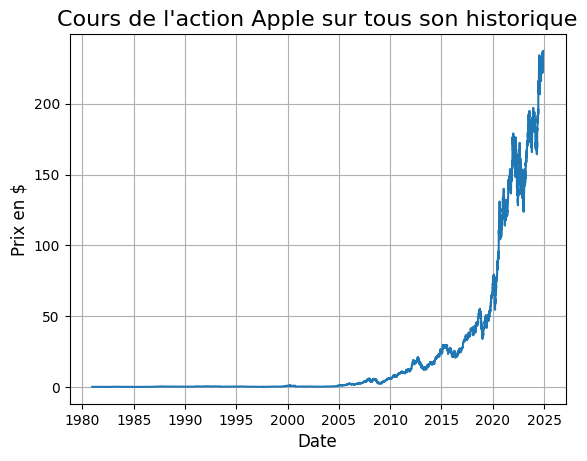

In [77]:
plt.plot(historique_max['Close'])
plt.title("Cours de l'action Apple sur tous son historique", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix en $', fontsize=12)
plt.grid(True)
plt.show()

On constate que de 1982 à 2005 l'action de Apple vaut zéro, on doit donc supprimer cette partie pour s'intéresser uniquement à des périodes où l'action subit des fluctuations. Pour que cette modification s'applique peu importe l'aciton choisie on va supprimer les données dont la valeur est inférieur à 0.2 fois la moyenne de toutes les données 

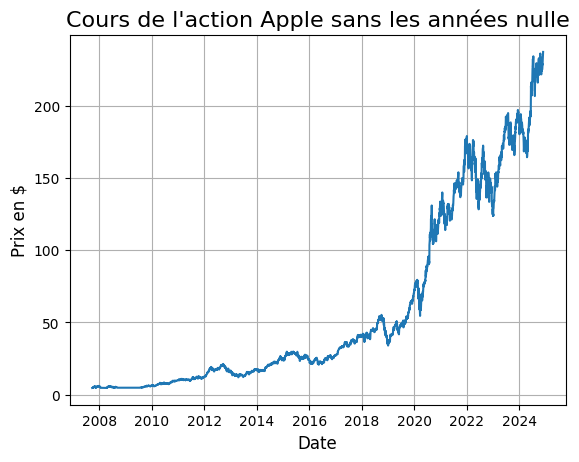

In [78]:
mean_open = historique_max['Close'].mean()
historique_max = historique_max[(historique_max['Close'] >= 0.2*mean_open)]
plt.plot(historique_max['Close'])
plt.title("Cours de l'action Apple sans les années nulle", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix en $', fontsize=12)
plt.grid(True)
plt.show()

En bourse on parle de jours ouvrables où on ne compte pas les weeks-ends, jours fériés ou autre. Le problème pour nos prédictions c'est que le modèle va comprendre que l'écart entre chaque ligne est le même. Alors qu'entre un vendredi et un lundi, même si aucun changement n'a eu lieu en bourse, plusieurs jours se sont écoulées, des évenements dans le monde ont eu lieu. On va donc ajouter les dates manquantes et les compléter par la valeur de la veille, c'est un méthode plutôt naïve qui peut être largement amélioré.

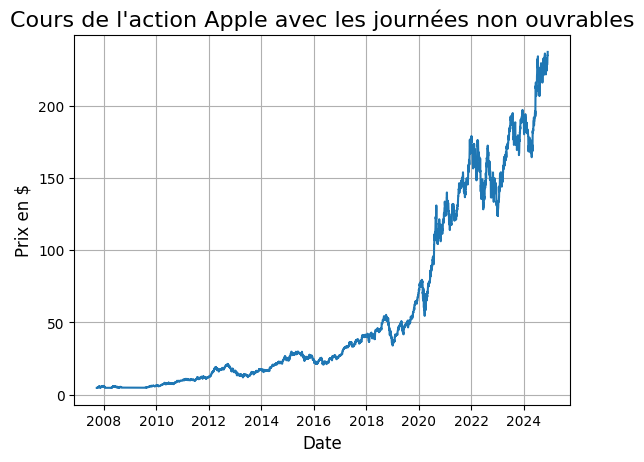

In [79]:
date_range = pd.date_range(start=historique_max.index.min(), end=historique_max.index.max())
historique_max = historique_max.reindex(date_range)

# On remplace les valeurs manquantes par la denrière valeur connue
historique_max = historique_max.ffill()
historique_max_clean = historique_max.copy()

plt.plot(historique_max['Close'])
plt.title("Cours de l'action Apple avec les journées non ouvrables", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix en $', fontsize=12)
plt.grid(True)
plt.show()

On constate que la courbe s'est legeremment élargit

## Modèle naïf

Nos premières variables pour entrainer le modèle vont être l'historique de l'action. Pour chaque journée on va regarder son passé sur 6 mois (180 jours)

Pour chaque journée on associe également le prix de l'action le lendemain. Il s'agit de notre objectif, ce qu'on souhaite prédire.

In [80]:
lags = [historique_max['Close'].shift(lag) for lag in range(1, 180)]
lag_df = pd.concat(lags, axis=1)

lag_df.columns = [f'Close_lag{lag}' for lag in range(1, 180)]

historique_max = pd.concat([historique_max, lag_df], axis=1)

historique_max['Target'] = historique_max['Close'].shift(-1)

historique_max.dropna(inplace=True)

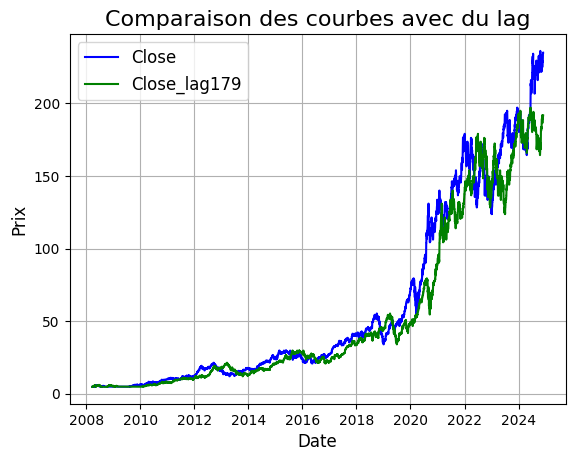

In [81]:
plt.plot(historique_max['Close'], label='Close', color='blue')
plt.plot(historique_max['Close_lag179'], label='Close_lag179', color='green')
plt.title('Comparaison des courbes avec du lag', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

On créé nos jeux de données pour entrainer un premier modèle

In [82]:
X = historique_max.drop(columns=['Target','Dividends','Stock Splits'])
y = historique_max['Target']

# Entraîner le modèle sur toutes les données disponibles
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.5)
model.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46920
[LightGBM] [Info] Number of data points in the train set: 6096, number of used features: 184
[LightGBM] [Info] Start training from score 59.979472


LGBMRegressor(learning_rate=0.5)

Le modèle est entrainé on peut donc prédire pour une période définit les nouvelles valeurs de l'action. Pour ce faire, on fait une première prédiction qu'on ajoute dans le jeu de données qu'on réutilise pour faire une prédiction. Ainsi au bout de 180 jours les prédictions sont faites uniquement à partir des prédictions du modèle. Ainsi plus on voudra prédire une date lointaine plus les prévisions seront incertaines

In [83]:
# Prévoir la prochaine année
predictions = []
last_date = X.iloc[-1].values

period = 365

for _ in range(period):
    predict = model.predict(last_date.reshape(1, -1))[0]
    predictions.append(predict)
    last_date = np.roll(last_date, -1)  
    last_date[-1] = predict 

# Résultats des prédictions
future_dates = pd.date_range(historique_max_df.index[-1], periods=period, freq='B')
predict_df = pd.DataFrame({'Date': future_dates, 'Predictions': predictions}).set_index('Date')
predict_df.reset_index(inplace=True)

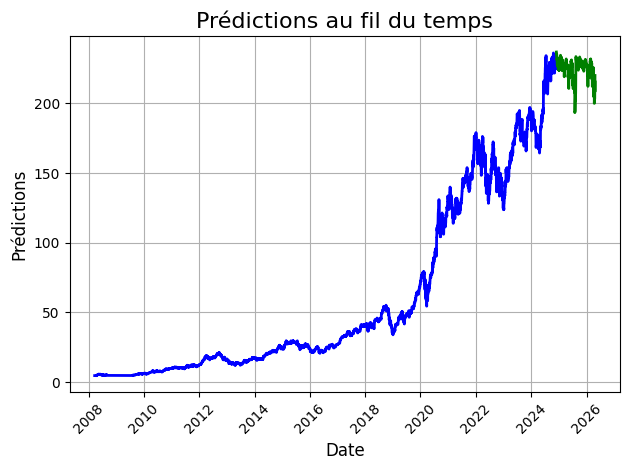

In [84]:
predict_df['Date'] = pd.to_datetime(predict_df['Date'])
plt.plot(historique_max['Close'], label='Close', color='blue', linestyle='-', linewidth=2)
plt.plot(predict_df['Date'], predict_df['Predictions'], color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Prédictions au fil du temps', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prédictions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


On peut constater que les prédictions ne sont pas illogiques mais qu'un effet miroir apparait clairement. Etant donnée qu'un prediction se base uniquement sur l'historique des 6 derniers mois les prédictions resssemblent énormément à ce qu'il s'est passée dans le passé.

 De plus le prix de l'action ayant été multiplié par plusieurs centaines entre le début et la fin de nos données le modèle n'utilise presque jamais le passé car les valeurs sont très différentes. Par exemple, pour faire sa première prédiction le modèle regarde la valeur de l'action sur les 6 derniers mois, elle est proche de 200 et il va prédire quelque chose proche de 200. Le modèle à été entrainé avec des valeurs de l'action inférieur à 200 (elle vaut moins de 50$ de 2008 à 2018) et il ne va donc pas utiliser ces informations.

## Modèle complet

On va donc ajouter des variables "invariantes" au prix de l'action pour que les tendances et comportement passé puisse être compris par le modèle. Pour éviter d'avoir trop de variables, on réduit le retard (lag) a 30 jours

In [85]:
# Retard sur 30 jours
historique_max = historique_max_clean.copy()

lags = [historique_max['Close'].shift(lag) for lag in range(1, 180)]
lag_df = pd.concat(lags, axis=1)

lag_df.columns = [f'Close_lag{lag}' for lag in range(1, 180)]

historique_max = pd.concat([historique_max, lag_df], axis=1)

historique_max['Target'] = historique_max['Close'].shift(-1)

Ajout de période

In [86]:

historique_max['Year'] = historique_max.index.year
historique_max['Month'] = historique_max.index.month
historique_max['Day'] = historique_max.index.day
historique_max['Weekday'] = historique_max.index.weekday

### Moyennes mobiles

Une moyenne mobile permet de capter la tendance sur une période définit

In [87]:
# Moyenne mobile sur 30 jours
historique_max['MA_30'] = historique_max['Close'].rolling(window=30).mean()

# Moyenne mobile sur 6 mois
historique_max['MA_180'] = historique_max['Close'].rolling(window=180).mean()

# Moyenne mobile sur un an
historique_max['MA_365'] = historique_max['Close'].rolling(window=365).mean()


### Volativité

Permet de capter l'intensité des changemetents sur une période définit

In [88]:
# Calcul de la volatilité sur 30 jours
historique_max['volatility_30'] = historique_max['Close'].rolling(window=30).std()

### RSI

RSI (Relative Strength Index) est un indicateur pour détecter les surachats ou surventes pour anticiper les pics intenses à certaine période.

In [89]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

historique_max['RSI_14'] = calculate_rsi(historique_max['Close'], window=14)

In [90]:
historique_max.dropna(inplace=True)

On ajoute également un poid pour les observations les plus récentes

In [91]:
time_weights = np.exp(-0.01 * (historique_max.index.max() - historique_max.index).days)
X = historique_max.drop(columns=['Target','Dividends','Stock Splits'])
y = historique_max['Target']

# Entraîner le modèle sur toutes les données disponibles
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.5)
model.fit(X, y, sample_weight=list(time_weights))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48264
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 193
[LightGBM] [Info] Start training from score 217.801385


LGBMRegressor(learning_rate=0.5)

In [92]:
# Prévoir la prochaine année
predictions = []
last_date = X.iloc[-1].values

period = 365

for _ in range(period):
    predict = model.predict(last_date.reshape(1, -1))[0]
    predictions.append(predict)
    last_date = np.roll(last_date, -1)  
    last_date[-1] = predict 

# Résultats des prédictions
future_dates = pd.date_range(historique_max_df.index[-1], periods=period, freq='B')
predict_df = pd.DataFrame({'Date': future_dates, 'Predictions': predictions}).set_index('Date')
predict_df.reset_index(inplace=True)

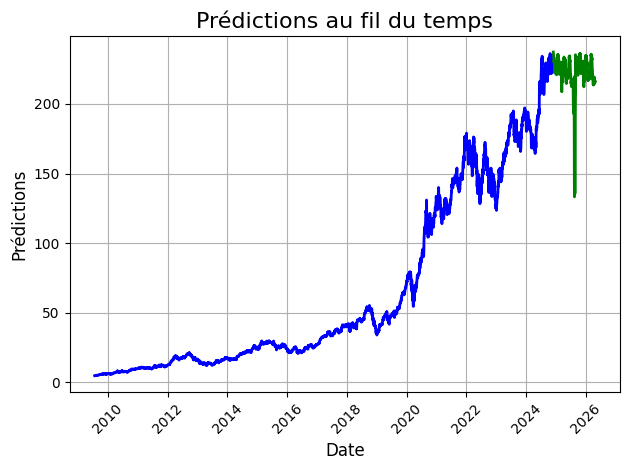

In [93]:
predict_df['Date'] = pd.to_datetime(predict_df['Date'])
plt.plot(historique_max['Close'], label='Close', color='blue', linestyle='-', linewidth=2)
plt.plot(predict_df['Date'], predict_df['Predictions'], color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Prédictions au fil du temps', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prédictions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Malheureusement ces indicateurs n'ont pas l'air d'améliorer clairement les prédictions du modèle

### Amélioration potentielle

Pour améliorer le modèle il faudrait ajouter des termes de tendance ou de saisonnalité à l'aide des features d'une régression tslm par exemple mais également des indacteurs externes (taux des prêts dans les banques). En effet l'historique unique d'une série temporelle n'est pas suffisant pour faire de bonnes prédictions. Egalement, créé un modèle adapté selon chaque action serait plus adapté. Faire un modèle qui s'adapte à chaque action est difficilement réalisable. 